# Les bases de la dynamique des populations

La première étape consiste à appréhender la croissance géométique (temps discret) et exponentielle (temps continu).

## 1 La suite de Fibonacci

![Fibonacci](https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg?uselang=fr "Fibonacci" width=10)

![Fibonacci](https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg?uselang=fr)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg?uselang=fr"/> 



## 2 La croissance géométrique
## 3 La croissance exponentielle
## 4 La croissance logistique


Modèle linéaire
$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
taux de naissance $\lambda>0$, taux de mort $\mu>0$
In equation \eqref{eq:sample}, we find the value of an
interesting integral:

\begin{equation}
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
  \label{eq:sample}
\end{equation}


In [2]:
import numpy as np
population = lambda t: x0*np.exp((rb-rd)*t)

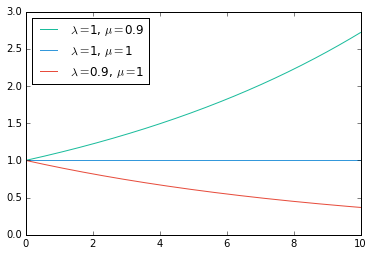

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

f_rouge, f_bleu, f_vert, f_alsphat = '#e74c3c', '#3498db', '#1abc9c', '#34495e'

t0, t1 = 0, 10

temps = np.linspace(t0,t1,200, endpoint=True)

x0, rb, rd = 1, 1, 0.9
legend1 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(temps, population(temps), color=f_vert)
x0, rb, rd = 1, 1, 1
legend2 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(temps, population(temps), color=f_bleu)
x0, rb, rd = 1, 0.9, 1
legend3 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(temps, population(temps), color=f_rouge)
plt.legend((legend1, legend2, legend3), loc='upper left')
plt.show()

## 2. Logistique
$$
  \dot x(t) = r\,\left(1-\frac{x(t)}{K}\right)\,x(t)\,,\ x(0)=x_0
$$
admet l'unique solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$


In [4]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

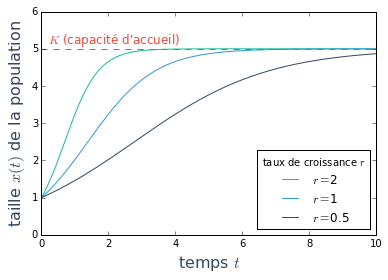

In [5]:
t0, t1 = 0, 10

temps = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5

r = 2
legend1 = r'$r=$'+str(r)
plt.plot(temps, population(temps), color=f_vert)
r = 1
legend2 = r'$r=$'+str(r)
plt.plot(temps, population(temps), color=f_bleu)

r = 0.5
legend3 = r'$r=$'+str(r)
plt.plot(temps, population(temps), color=f_alsphat)

plt.ylim([0,K*1.2])
plt.legend((legend1, legend2, legend3), loc='lower right',title=r'taux de croissance $r$')
plt.plot([t0, t1], [K, K], color=f_rouge, linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (capacité d'accueil)", size=12, 
         verticalalignment='bottom', horizontalalignment='left', color=f_rouge)
plt.xlabel(r'temps $t$', fontsize=16, color=f_alsphat)
plt.ylabel(r'taille $x(t)$ de la population', fontsize=16, color=f_alsphat)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_logistique.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_edo_logistique'
    plt.show()

## 3. Lotka-Volterra

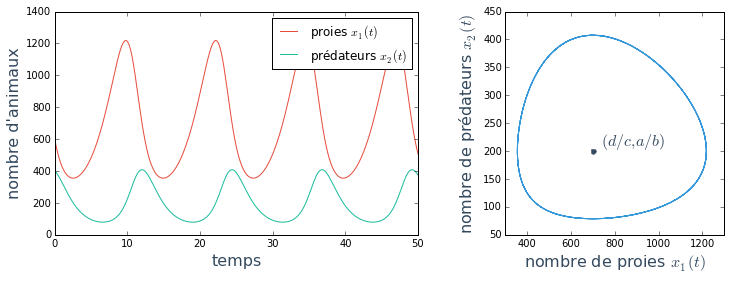

In [6]:
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec

a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = odeint(f, xy0, t)

fig = plt.subplots(1, 2, figsize=(12, 4))

gs = gridspec.GridSpec(1, 2, width_ratios=[8.3, 5], wspace=0.3)

ax0 = plt.subplot(gs[0])
ax0.plot(t, xy_t[:,0], color=f_rouge, label=r"proies $x_1(t)$")
ax0.plot(t, xy_t[:,1], color=f_vert, label=r"prédateurs $x_2(t)$")
ax0.set_xlabel("temps", fontsize=16, color=f_alsphat)
ax0.set_ylabel("nombre d'animaux", fontsize=16, color=f_alsphat)
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(xy_t[:,0], xy_t[:,1], color=f_bleu)
ax1.set_xlabel(r"nombre de proies $x_1(t)$", fontsize=16, color=f_alsphat)
ax1.set_ylabel(r"nombre de prédateurs $x_2(t)$", fontsize=16, color=f_alsphat)
marker_style = dict(linestyle=':', color=f_alsphat, markersize=10)
ax1.plot([d/c], [a/b], marker='.', **marker_style)
ax1.text(1.05*d/c, 1.05*a/b, r'$(d/c,a/b)$', fontsize=16, color=f_alsphat)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_lv.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_edo_lv'
    plt.show()